In [1]:
from Annau2022.models import generator, critic
from Annau2022.SRModel import SRModelData, SuperResolver
from Annau2022.RAPSD import compute_rapsd

import torch
import torch.utils.data as data_utils

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
    'mathtext.default': 'regular',
    'text.latex.preamble': r'\usepackage{mathrsfs}'
    })


In [5]:
model_list = [
    SRModelData(region="southeast", sr_model_name="CNN", exp_id="e25c6b40324643c3afc1cf42981b11b5"),
    SRModelData(region="southeast", sr_model_name="L_13", exp_id="e1d15a0615ca489aa6a17ec60247d0af"),
    SRModelData(region="southeast", sr_model_name="L_9", exp_id="3f48868c52404eb0a833897aa4642871"),
    SRModelData(region="southeast", sr_model_name="L_5", exp_id="1824682ae27c48669665cf042052d584"),
    SRModelData(region="southeast", sr_model_name="NFS", exp_id="feda42500d2b45549be96f1bf62b0b03"),

    SRModelData(region="central", sr_model_name="CNN", exp_id="fbe44b0423204805bc6af4d7d6ac562e"),
    SRModelData(region="central", sr_model_name="L_13", exp_id="bcf7e7cfa8ab4c4196ad6a2bb18e8601"),
    SRModelData(region="central", sr_model_name="L_9", exp_id="079a94c41ad3482996cc2b9f95adba8d"),
    SRModelData(region="central", sr_model_name="L_5", exp_id="202ea9f8a73b401fa22e62c24d9ab2d0"),
    SRModelData(region="central", sr_model_name="NFS", exp_id="0c5ee480663f4f9eb7200f8879aa1244"),

    SRModelData(region="west", sr_model_name="CNN", exp_id="f76c0170818244629de4544805f93a59"),
    SRModelData(region="west", sr_model_name="L_13", exp_id="c4ec13e65fe74b399fc9e325a9966fef"),
    SRModelData(region="west", sr_model_name="L_9", exp_id="6abe7a9940c04b47819689070100e5e6"),
    SRModelData(region="west", sr_model_name="L_5", exp_id="70f5be887eff42e8a216780752644b2f"),
    SRModelData(region="west", sr_model_name="NFS", exp_id="db9f0fae83c949eaad5d1176a43dae47"),
]

In [6]:
rapsd = {"southeast":{}, "central":{}, "west":{}}

for model in model_list:
    rapsd[model.region][model.sr_model_name] = {}

    lr, hr = model.load_test()
    generator = model.load_generator()
    sr = SuperResolver(region=model.region, lr=lr, hr=hr, model=generator)

    rapsd[model.region][model.sr_model_name] = compute_rapsd(sr.super_resolve())
    rapsd[model.region]["ground_truth"] = compute_rapsd(sr.ground_truth())


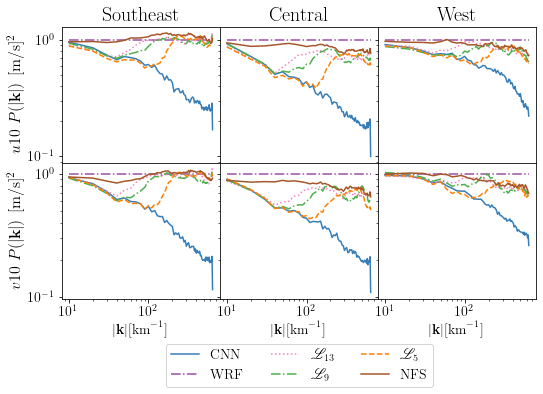

In [7]:
markermap = {
    "CNN": "-",
    "L_5": "--",
    "L_9": "-.",
    "L_13": ":",
    "NFS": "-",
    "ground_truth": "-."
}

colormap = {
    "CNN": "#377eb8",
    "L_5": "#ff7f00",
    "L_9": "#4daf4a",
    "L_13": "#f781bf",
    "NFS": "#a65628",
    "ground_truth": "#984ea3"
}

titlemap = {
    "CNN": "CNN",
    "L_5": r"$\mathscr{L}_5$",
    "L_9": r"$\mathscr{L}_9$",
    "L_13": r"$\mathscr{L}_{13}$",
    "NFS": "NFS",
    "ground_truth": "WRF"
}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8.5, 5), sharey='row', sharex='col')
for j, region in enumerate(rapsd):
    for sr_model in rapsd[region]:
        k = rapsd[region][sr_model]["k"]
        for i, var in enumerate(rapsd[region][sr_model]):
            if var != "k":
                axes[i, j].loglog(
                    10*k,
                    rapsd[region][sr_model][var]/rapsd[region]["ground_truth"][var],
                    label=titlemap[sr_model],
                    color=colormap[sr_model],
                    linestyle = markermap[sr_model]
                )
                axes[i, 0].set_ylabel(fr"${var}$ "+r"$P(|\mathbf{k}|)$"+r" [m/s]$^2$", fontsize=16)

    axes[-1, j].set_xlabel(r"$|\mathbf{k}| [\textnormal{km}^{-1}]$")
    axes[0, j].set_title(region.capitalize(), fontsize=20)

axes[1, 1].legend(ncol=3, frameon=True, bbox_to_anchor=(0.5023, -0.49), loc='center', fontsize=14)
for ax in axes.flat:
    ax.set_aspect("auto")

fig.subplots_adjust(wspace=0, hspace=0)
